<a href="https://colab.research.google.com/github/ashrafulwork/learning_pytorch/blob/main/Pytorch_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
torch.__version__

'2.5.1+cu121'

In [2]:
!nvidia-smi

Thu Jan 16 16:21:45 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
torch.cuda.is_available()

True

In [4]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
# Count number of devices
torch.cuda.device_count()


1

Topics covered here:

experimenting with vision dataset <br>
Architecure of CNN with Pytorch <br>
Multi-class image classificariob model<br>

# Pytorch Computer Vision

In [6]:
# resource: https://www.learnpytorch.io/03_pytorch_computer_vision/

In [7]:
## 0. Computer Vision Libraries in PyTorch

In [8]:
# Torch Vision
# torchvision datasets

# Installing dependencies

In [9]:
# Import PyTroch
import torch
from torch import nn

# import torchvision

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matrplotlib for visualization

import matplotlib.pyplot as plt

# Check versions

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


## 1. Getting a dataset
Dataset Name: FashionMNIST

In [10]:
!pip install tqdm

In [11]:
from tqdm.notebook import tqdm
import time

# Simplified bar format to ensure consistency in color
for i in tqdm(range(100), bar_format='{desc}: {percentage:3.0f}%|{bar}| {n_fmt}/{total_fmt}', colour='green'):
    time.sleep(0.1)  # Simulate some work


  0%|          | 0/100

In [12]:
# Setup training data

from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # where to download data?
    train = True, # do we want the training dataset?
    download = True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform= None # how do we want to transform the labels/targets?

)


test_data = datasets.FashionMNIST(
    root = "data", # where to download data?
    train = False, # do we want the training dataset?
    download = True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform= None # how do we want to transform the labels/targets?

)




100%|██████████| 26.4M/26.4M [00:02<00:00, 9.72MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.92MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 1.72MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [13]:
len(train_data), len(test_data)

(60000, 10000)

In [14]:
# see the first training example

In [15]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [16]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [17]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [18]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [19]:
## Check the shape of our image

print(f"Image Shape: {image.shape} -> [color_channels, height, width] ")
print(f"Image Label: {class_names[label]}" )
image.shape, label

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width] 
Image Label: Ankle boot


(torch.Size([1, 28, 28]), 9)

## 1.2 Visualizing our data

In [20]:
import matplotlib.pyplot as plt

Image shape: torch.Size([1, 28, 28])


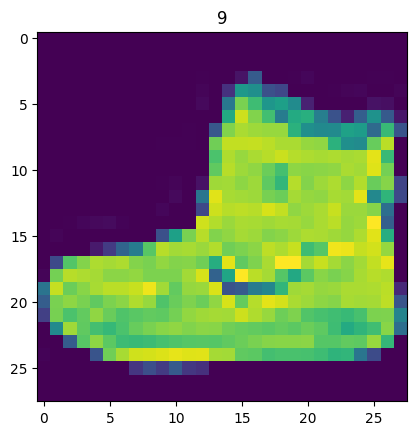

In [21]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(label);
# image

(-0.5, 27.5, 27.5, -0.5)

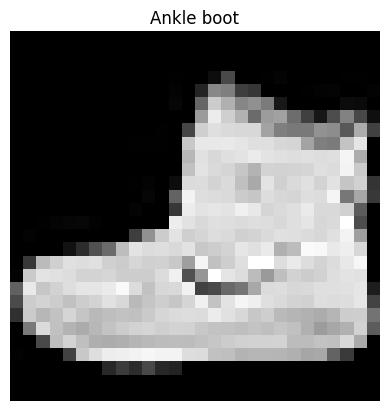

In [22]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label]);
plt.axis(False)

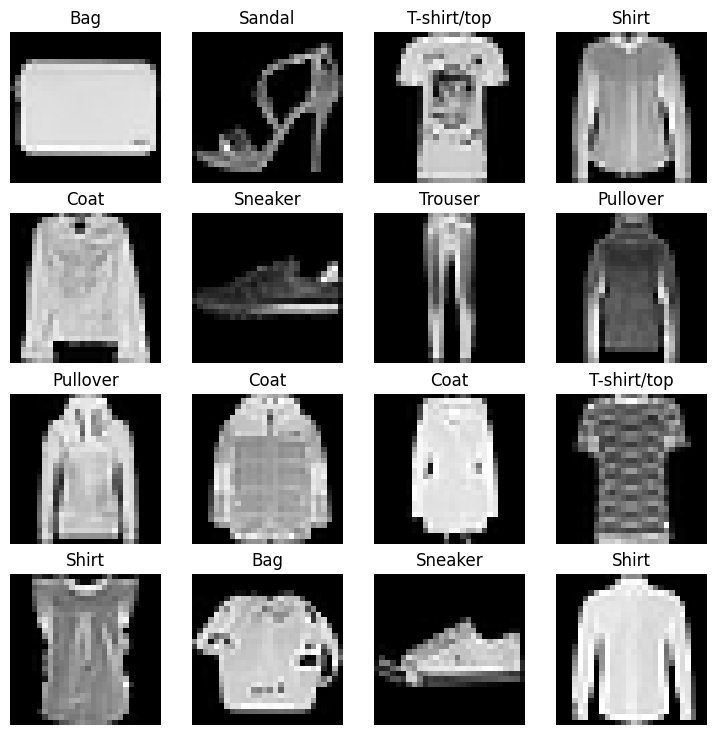

In [23]:
# plot more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols, = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we will need non-linearities?

## 2. Prepare DataLoader

In [25]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches (or mini batches)

why would we do this?



In [34]:
 from torch.utils.data import DataLoader

 #setup the batch size hyperparameter



 # Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset = train_data,
                               batch_size= 32,
                               shuffle = True
                               )

test_dataloader  = DataLoader(dataset = test_data,
                               batch_size= 32,
                               shuffle = False
                               )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c76b60a7c10>,
 <torch.utils.data.dataloader.DataLoader at 0x7c76e18f5a90>)

In [35]:
# Let's check out what we have created

In [36]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {batch_size}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {batch_size}... ")


DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c76b60a7c10>, <torch.utils.data.dataloader.DataLoader object at 0x7c76e18f5a90>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32... 


SyntaxError: invalid syntax (<ipython-input-37-eb3d33a4abe2>, line 1)